In [1]:
import numpy as np
import os.path
import matplotlib.pyplot as plt
import PIL.Image as Image
import sys
sys.path.append('../')

In [2]:
HR_images = '/old_home_that_will_be_deleted_at_some_point/yossi_gandelsman/datasets/SR/trainsets/trainValidH/DIV2K_valid_HR/'
LR_images = '/old_home_that_will_be_deleted_at_some_point/yossi_gandelsman/datasets/SR/trainsets/trainValidL/DIV2K_valid_LR_bicubic/X4/'
ORIG_results = '/old_home_that_will_be_deleted_at_some_point/yossi_gandelsman/datasets/SR/results/swinir_classical_sr_x4_12_6_22_orig/'
TTT_results = '/old_home_that_will_be_deleted_at_some_point/yossi_gandelsman/datasets/SR/results/swinir_classical_sr_x4_12_6_22_ttt/'

In [3]:
hr_image_name = '0822'
ttt_image_name = f'{hr_image_name}_12_6_22_ttt_ttt.png'
orig_image_name = ttt_image_name.replace('ttt', 'orig')
hr_image_name = hr_image_name + '.png'

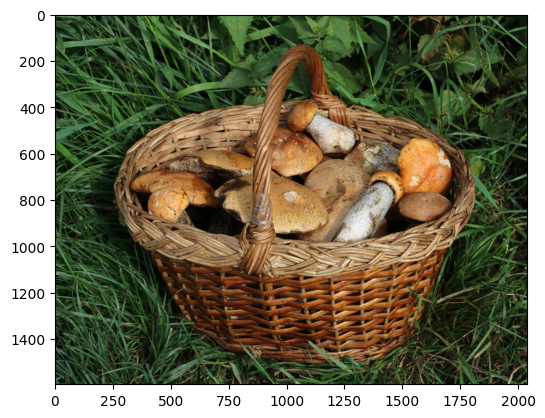

In [4]:
hr_image = np.array(Image.open(os.path.join(HR_images, hr_image_name)))
ttt_image = np.array(Image.open(os.path.join(TTT_results, ttt_image_name)))
orig_image = np.array(Image.open(os.path.join(ORIG_results, orig_image_name)))
plt.imshow(hr_image)

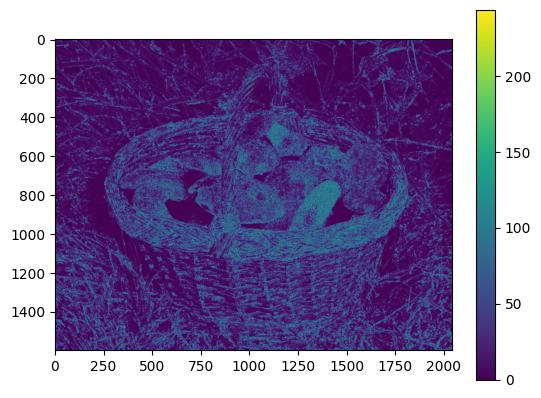

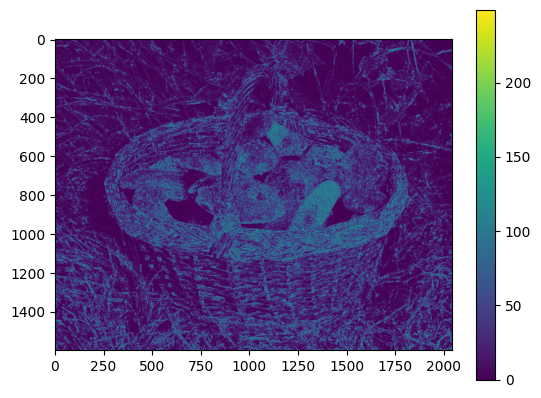

In [5]:
distance_ttt = np.mean((hr_image - ttt_image) ** 2, axis=2)
distance_orig = np.mean((hr_image - orig_image) ** 2, axis=2)
plt.imshow(distance_ttt)
plt.colorbar()
plt.show()
plt.imshow(distance_orig)
plt.colorbar()
plt.show()

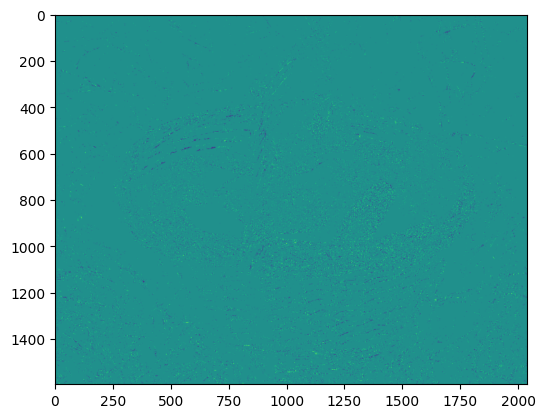

In [48]:
interval = 50
mask = np.ones_like(distance_orig) * 127.5
mask[distance_ttt < distance_orig - interval] = 255
mask[distance_orig < distance_ttt - interval] = 0
plt.imshow(mask)

In [49]:
print('General', len(np.nonzero((mask != 127.5).flatten())[0]))
print('TTT', len(np.nonzero((np.logical_and(mask != 0, mask != 127.5)).flatten())[0]))
print('Orig', len(np.nonzero((np.logical_and(mask != 255, mask != 127.5)).flatten())[0]))


General 119524
TTT 56186
Orig 63338
